In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
df=pd.read_csv('bank-full.csv',sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
df = df.replace('unknown', pd.NA)
df = df.dropna(axis=1, how='any')  # Drop columns with any 'unknown' values
df = df.dropna(axis=0, how='any')  # Drop rows with any 'unknown' values

In [ ]:
df.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,married,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,single,no,29,yes,no,5,may,151,1,-1,0,no
2,33,married,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,married,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,single,no,1,no,no,5,may,198,1,-1,0,no


In [ ]:
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,1,0,2143,1,0,5,8,261,1,-1,0,0
1,44,2,0,29,1,0,5,8,151,1,-1,0,0
2,33,1,0,2,1,1,5,8,76,1,-1,0,0
3,47,1,0,1506,1,0,5,8,92,1,-1,0,0
4,33,2,0,1,0,0,5,8,198,1,-1,0,0


In [ ]:
X = df.drop('y', axis=1)  # 'y' is the target variable
y = df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing complete.")

Data preprocessing complete.


In [ ]:
X_train

array([[-0.46479895,  1.37040295, -0.14054369, ...,  0.38927718,
        -0.41065469, -0.24051221],
       [ 1.41634262, -0.2779871 , -0.14054369, ...,  0.0722149 ,
        -0.41065469, -0.24051221],
       [ 0.47577183, -0.2779871 , -0.14054369, ..., -0.24484738,
        -0.41065469, -0.24051221],
       ...,
       [-0.65291311, -1.92637714, -0.14054369, ..., -0.56190966,
        -0.41065469, -0.24051221],
       [-0.74697019, -0.2779871 , -0.14054369, ..., -0.56190966,
        -0.41065469, -0.24051221],
       [-0.2766848 , -0.2779871 , -0.14054369, ...,  2.29165084,
        -0.41065469, -0.24051221]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy of the Random Forest classifier:", accuracy)
print("\nConfusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", classification_rep)

Accuracy of the Random Forest classifier: 0.8998083161309348

Confusion Matrix:
 [[11577   389]
 [  970   628]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.62      0.39      0.48      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



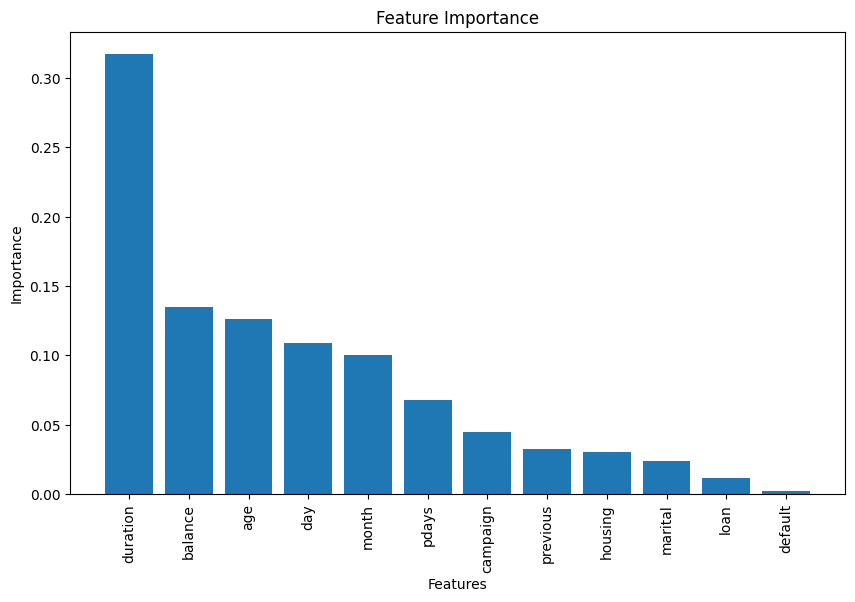

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importances = rf_classifier.feature_importances_
features = X.columns

# Plot feature importance
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


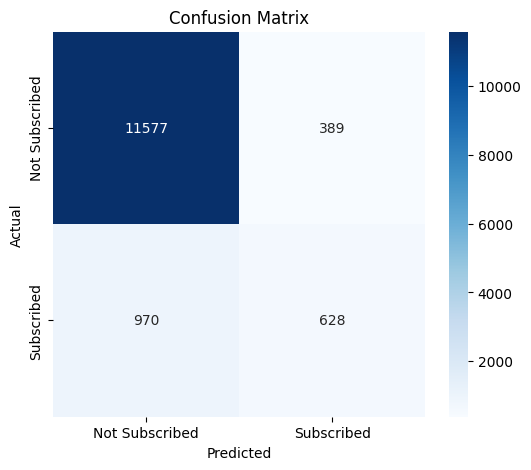

In [ ]:
import seaborn as sns

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
